In [1]:
#from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def generate_HR_diagram(data_x_axis, unc_x_axis, data_y_axis, unc_y_axis, colorvec, sizevec, ms_x_axis, ms_y_axis, ms_xtickpos, ms_xticklabel, xcolorname, filename):
    unc_mags = np.sqrt((unc_x_axis**2) + (unc_y_axis**2))
    
    unc_mags_dict = {}
    
    for i in range(unc_mags.size):
        unc_mags_dict[unc_mags[i]] = (unc_x_axis[i], unc_y_axis[i])
    
    max_unc_mags = max(unc_mags)
    
    max_unc_split = unc_mags_dict[max_unc_mags]
    
    print max_unc_mags, max_unc_split
    
    fig = plt.figure(figsize=(7.5,5.5))
    #fig = plt.figure()
    
    plt.gcf().subplots_adjust(left = 0.11)
    plt.gcf().subplots_adjust(right=1.01)
    plt.gcf().subplots_adjust(top=0.89)
    plt.gcf().subplots_adjust(bottom=0.14)
    
    ax1 = fig.add_subplot(111)

    plt.rcParams['xtick.labelsize'] = 15
    plt.rcParams['ytick.labelsize'] = 15
    params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
    plt.rcParams.update(params)

    
    plt.gca().invert_yaxis()
    im = ax1.scatter(data_x_axis, data_y_axis, c = colorvec, s = sizevec)
    ax1.plot(ms_x_axis,ms_y_axis,'grey')
    ax1.set_xlim([-0.25, 2.25])
    ax1.set_ylim([6,-8.5])
    fig.colorbar(im, ax=ax1)
    
    ax1.errorbar(-0.125, 5.5,xerr=max_unc_split[0],yerr=max_unc_split[1],color='dimgrey',fmt='.')

    ax2 = ax1.twiny()

    ax2.set_xticks(ms_xtickpos)
    ax2.set_xticklabels(ms_xticklabel)
    ax2.xaxis.set_label_position('top')
    ax2.set_xlabel(r'$\mathrm{Main\,\,Seq. Sp. Type}$',fontsize=18)
    ax2.set_xlim([-0.25,2.25])

    ax1.set_xlabel(xcolorname, fontsize=24)
    ax1.set_ylabel(r'$\mathrm{M_{K_{s}}}$',fontsize=24)
    plt.savefig(filename)
    plt.close()
    #plt.show()
    
    
    return

In [29]:
df = pd.read_csv('hr_diagram_revised_input.csv')
data = df.values

df1 = pd.read_csv('zamsdata_mamajek_gaiaconvert.csv')
data1 = df1.values

df2 = pd.read_csv('mamajek_ms_hmink.csv')
data2 = df2.values

df3 = pd.read_csv('mamajek_gmink_hrd_data.csv')
data3 = df3.values

MS_bpminrp_vec = data1[:,1]
MS_MG_bpminrp_vec = data1[:,0]

MS_hmink_vec = data2[:,1]
MS_MK_vec = data2[:,2]

MS_MG_gmink_vec = data3[:,4]
MS_gmink_vec = data3[:,6]

MS_MK_gmink_vec = data3[:,-3]
MS_jmink_vec = data3[:,-1]

#print MS_bpminrp_vec
#print MS_MG_vec

bp_vec = data[:,1]
rp_vec = data[:,2]

kvec = data[:,10]
hvec = data[:,8]
jvec = data[:,6]

kunc_vec = data[:,11]
hunc_vec = data[:,9]
junc_vec = data[:,7]

print junc_vec[0]
print hunc_vec[0]
print kunc_vec[0]

bpminrp_vec = bp_vec - rp_vec

hmink_vec = hvec - kvec
jmink_vec = jvec - kvec

hmink_unc_vec = np.array([np.sqrt((kunc_vec[i]**2) + (hunc_vec[i]**2)) for i in range(hmink_vec.size)])
jmink_unc_vec = np.array([np.sqrt((kunc_vec[i]**2) + (junc_vec[i]**2)) for i in range(jmink_vec.size)])

print max(hmink_unc_vec)
print max(jmink_unc_vec)

G_vec = data[:,3]

Gmink_vec = G_vec - kvec

plx_vec = data[:,12]

plx_unc_vec = data[:,13]

dist_vec = 1000./plx_vec

dist_unc_vec = plx_unc_vec/plx_vec*dist_vec

#print dist_vec

log_dist_vec = np.array([np.log10(dist_vec[i]) for i in range(dist_vec.size)])

dist_mod_unc_vec = np.array([((1./np.log(10.)) * (dist_unc_vec[i]/dist_vec[i])) for i in range(dist_vec.size)])

dist_mod_vec = (5.*log_dist_vec) - 5.


M_G_vec = G_vec - dist_mod_vec

M_K_vec = kvec - dist_mod_vec

M_K_unc_vec = np.array([np.sqrt((kunc_vec[i]**2) + (dist_mod_unc_vec[i]**2)) for i in range(dist_vec.size)])

Tdisk_vec = data[:,-2]
Lir_Lstar_vec_raw = data[:,-1]
Lir_Lstar_vec = np.array([float(Lir_Lstar_vec_raw[i]) for i in range(Tdisk_vec.size)])
log_Lir_Lstar_vec = np.log10(Lir_Lstar_vec)
min_log_Lir_Lstar_vec = min(log_Lir_Lstar_vec)

Tdisk_list_use = []
log_Lir_Lstar_list_use = []
M_G_list_use = []
bpminrp_list_use = []
M_K_list_use = []
hmink_list_use = []
Gmink_list_use = []
jmink_list_use = []
M_K_unc_list_use = []
jmink_unc_list_use = []


hot_bpminrp = None
hot_M_G = None
hot_Tdisk = None
hot_Lir_Lstar = None

for i in range(Tdisk_vec.size):
    if Tdisk_vec[i] > 4000.:
        hot_bminv = bminv_vec[i]
        hot_M_v = bminv_vec[i]
        hot_Tdisk = Tdisk_vec[i]
        hot_Lir_Lstar = Lir_Lstar_vec[i]
    else:
        bpminrp_list_use.append(bpminrp_vec[i])
        M_G_list_use.append(M_G_vec[i])
        Tdisk_list_use.append(Tdisk_vec[i])
        log_Lir_Lstar_list_use.append(log_Lir_Lstar_vec[i])
        hmink_list_use.append(hmink_vec[i])
        M_K_list_use.append(M_K_vec[i])
        Gmink_list_use.append(Gmink_vec[i])
        jmink_list_use.append(jmink_vec[i])
        #M_G_gmink_list_use.append(M_G_)
        M_K_unc_list_use.append(M_K_unc_vec[i])
        jmink_unc_list_use.append(jmink_unc_vec[i])
        
        
bpminrp_vec_use = np.array(bpminrp_list_use)
M_G_vec_use = np.array(M_G_list_use)
Tdisk_vec_use = np.array(Tdisk_list_use)
log_Lir_Lstar_vec_use = np.array(log_Lir_Lstar_list_use)

M_K_vec_use = np.array(M_K_list_use)
hmink_vec_use = np.array(hmink_list_use)
Gmink_vec_use = np.array(Gmink_list_use)
jmink_vec_use = np.array(jmink_list_use)
M_K_unc_vec_use = np.array(M_K_unc_list_use)
jmink_unc_vec_use = np.array(jmink_unc_list_use)

print jmink_unc_vec_use[0]
        
#size_vec = (log_Lir_Lstar_vec + 1. - min_log_Lir_Lstar_vec)*100.

max_log_Lir_Lstar_vec_use = max(log_Lir_Lstar_vec_use)

m = (50. - 1.)/(max_log_Lir_Lstar_vec_use - min_log_Lir_Lstar_vec)

size_vec = m*(log_Lir_Lstar_vec_use - min_log_Lir_Lstar_vec) + 1.

xtickpos = [-0.52958,-0.51061,-0.34292,-0.25689,-0.18212,-0.03698,+0.07412,+0.193791,+0.382923,+0.495714,+0.584288,+0.694129,+0.769925,+0.826533,+0.855239,+0.910022,+0.985759,+1.060643,+1.440061,+1.932861,+2.304058]
xticklabel_tex = [r'$\mathrm{O9}$',r'$\mathrm{B0}$',r'$\mathrm{B2}$',r'$\mathrm{B5}$',r'$\mathrm{B8}$',r'$\mathrm{A0}$',r'$\mathrm{A2}$',r'$\mathrm{A5}$',r'$\mathrm{F0}$',r'$\mathrm{F2}$',r'$\mathrm{F5}$',r'$\mathrm{F8}$',r'$\mathrm{G0}$',r'$\mathrm{G2}$',r'$\mathrm{G5}$',r'$\mathrm{G8}$',r'$\mathrm{K0}$',r'$\mathrm{K2}$',r'$\mathrm{K5}$',r'$\mathrm{M0}$',r'$\mathrm{M2}$']
xticklabel = ['O9','B0','B2','B5','B8','A0','A2','A5','F0','F2','F5','F8','G0','G2','G5','G8','K0','K2','K5','M0','M2']

xticklabeltexdict = {xticklabel_tex[i]: xtickpos[i] for i in range(len(xticklabel_tex))}
xticklabeldict = {xticklabel[i]: xtickpos[i] for i in range(len(xticklabel))}


xtickpos_GminK = [-1.060543586,-1.015380891,-0.636630764,-0.443609592,-0.275657562,0.023567874,0.168976954,0.37755883,0.68641431,0.861541118,0.998423643,1.184419419,1.314721505,1.422706079,1.485158105,1.601047865,1.760669122,1.912607286,2.496402185,3.001767315,3.288292342]
#for i in range(len(xtickpos)):

print len(xticklabel)
print len(xtickpos_GminK)

xticklabeldict_GminK = {xticklabel[i]: xtickpos_GminK[i] for i in range(len(xticklabel))}

#xtickpos_short = [-0.30,-0.17,-0.02,+0.15,+0.30,+0.44,+0.58,+0.63,+0.68,+0.81,+0.91,+1.15,+1.40,+1.64]
#xticklabel_short = ['B0','B5','A0','A5','F0','F5','G0','G2','G5','G8','K2','K5','M0','M5']

xticklabelshort_tex = [r'$\mathrm{B0}$',r'$\mathrm{B5}$',r'$\mathrm{A0}$',r'$\mathrm{A5}$',r'$\mathrm{F0}$',r'$\mathrm{F5}$',r'$\mathrm{G0}$',r'$\mathrm{K0}$',r'$\mathrm{K2}$',r'$\mathrm{K5}$',r'$\mathrm{M0}$']
xticklabelshort = ['B5','A0','F0','G0','K0','K5','M0']
xtickposshort = [xticklabeldict[x] for x in xticklabelshort]
xtickposshort_GminK = [xticklabeldict_GminK[x] for x in xticklabelshort]

xtickpos_JminK = [-0.24, -0.23, -0.14, -0.11, -0.06, 0, 0.03, 0.07, 0.14, 0.19, 0.23, 0.29, 0.33, 0.37, 0.39, 0.42, 0.48, 0.53, 0.7, 0.82, 0.83]

xticklabeldict_JminK = {xticklabel[i]: xtickpos_JminK[i] for i in range(len(xticklabel))}

xtickposshort_JminK = [xticklabeldict_JminK[x] for x in xticklabelshort]

print [(x, xticklabeldict_JminK[x]) for x in xticklabelshort]

#ytickpos = [-5.7,-4.5,-4.0,-2.45,-1.2,-0.25,0.65,1.3,1.95,2.7,3.6,3.5,4.0,4.4,4.7,5.1,5.5,5.9,6.4,7.35,8.8,9.9,12.3]

generate_HR_diagram(jmink_vec_use, jmink_unc_vec_use, M_K_vec_use, M_K_unc_vec_use, Tdisk_vec_use, size_vec, MS_jmink_vec, MS_MK_gmink_vec, xtickposshort_JminK, xticklabelshort, r'$\mathrm{J - K}$', 'HR_diagram_JminK_vs_MK.pdf')

0.027
0.047
0.023
0.0794040301244
0.0664078308635
0.0354682957019
21
21
[('B5', -0.11), ('A0', 0), ('F0', 0.14), ('G0', 0.33), ('K0', 0.48), ('K5', 0.7), ('M0', 0.82)]
0.150137970958 (0.036124783736376891, 0.1457271777099689)


In [30]:
def near_main_sequence(target_jmink_vec, target_MK_vec, ms_jmink_vec, ms_MK_vec, limit):
    
    counter = 0
    
    early_counter = 0
    
    for i in range(len(target_jmink_vec)):
        print i, target_jmink_vec[i], target_MK_vec[i]
        #target_jmink = target_jmink_vec[i]
        #target_MK = target_MK_vec[i]
        
        check = True
        within_range = False
        
        if (target_MK_vec[i] < -5.) or (target_jmink_vec[i] > 1.75)  or (target_MK_vec[i] < ((44./7.*target_jmink_vec[i]) - (24./7.))):
            check = False
        #else:
        #    within_range = False    
        
        j=0
        while ((not within_range) and (j<ms_jmink_vec.size)) and check:
            #print j
            #MS_point_jmink = ms_jmink_vec[j]
            #MS_point_MK = ms_MK_vec[j]
            
            jmink_dist = (target_jmink_vec[i] - ms_jmink_vec[j])
            MS_dist = (target_MK_vec[i] - ms_MK_vec[j])
            
            distance = np.sqrt((jmink_dist**2) + (MS_dist**2))

            print jmink_dist, MS_dist, distance
            
            if distance < limit:
                within_range = True
                
            j += 1
                
        if within_range:
            counter += 1
            if target_jmink_vec[i] < 0.33:
                early_counter += 1
            
    print 'counter:',counter
    print 'early counter:',early_counter
    return
    

In [32]:
near_main_sequence(jmink_vec_use, M_K_vec_use, MS_jmink_vec, MS_MK_gmink_vec, 1.5)

0 -0.03 1.2932155279
0.21 4.4932155279 4.49812024963
0.2 4.4132155279 4.41774504648
0.2 4.3332155279 4.33782858251
0.18 3.9832155279 3.98728051956
0.17 3.5232155279 3.5273145105
0.15 3.3432155279 3.34657885997
0.11 2.3932155279 2.39574217373
0.1 2.1532155279 2.15553638558
0.09 1.9032155279 1.90534231718
0.08 1.8432155279 1.84495080755
0.08 1.7732155279 1.77501924169
0.06 1.4332155279 1.43447089528
1 0.618 -1.250596638
2 0.031 1.30664056075
0.271 4.50664056075 4.51478129524
0.261 4.42664056075 4.43432832051
0.261 4.34664056075 4.35446956177
0.241 3.99664056075 4.00390019504
0.231 3.53664056075 3.54417655541
0.211 3.35664056075 3.36326580188
0.171 2.40664056075 2.41270797832
0.161 2.16664056075 2.17261416719
0.151 1.91664056075 1.92257952738
0.141 1.85664056075 1.8619868882
0.141 1.78664056075 1.79219571848
0.121 1.44664056075 1.45169208581
3 0.022 -0.359127365826
0.262 2.84087263417 2.85292855214
0.252 2.76087263417 2.77234949134
0.252 2.68087263417 2.69269049106
0.232 2.33087263417 2.3

0.294 2.90606584295 2.92089963599
0.284 2.84606584295 2.8602004794
0.284 2.77606584295 2.79055506385
0.264 2.43606584295 2.45032911895
0.254 2.37606584295 2.38960350059
0.234 2.24606584295 2.25822225896
0.204 1.47606584295 1.49009609513
28 0.344 0.685486298766
0.584 3.88548629877 3.92912964636
0.574 3.80548629877 3.84853244368
0.574 3.72548629877 3.76944613468
0.554 3.37548629877 3.4206466864
0.544 2.91548629877 2.9658045044
0.524 2.73548629877 2.7852219464
0.484 1.78548629877 1.84992359925
0.474 1.54548629877 1.61654072008
0.464 1.29548629877 1.37607439853
29 0.318 0.433487599103
0.558 3.6334875991 3.67608434789
0.548 3.5534875991 3.59549414086
0.548 3.4734875991 3.51644992871
0.528 3.1234875991 3.16780030648
0.518 2.6634875991 2.71339090265
0.498 2.4834875991 2.5329261053
0.458 1.5334875991 1.60042126223
0.448 1.2934875991 1.36887332103
30 0.131 0.223994126029
0.371 3.42399412603 3.44403495555
0.361 3.34399412603 3.36342351108
0.361 3.26399412603 3.2838968703
0.341 2.91399412603 2.93

0.196 2.76981564231 2.77674174031
0.156 1.81981564231 1.82648979521
0.146 1.57981564231 1.58654765566
0.136 1.32981564231 1.33675190014
90 1.47 0.266293469333
91 0.042 -0.601943099188
0.282 2.59805690081 2.61331660153
0.272 2.51805690081 2.5327049879
0.272 2.43805690081 2.45318271875
0.252 2.08805690081 2.10320841122
0.242 1.62805690081 1.64594449247
0.222 1.44805690081 1.46497535406
92 1.199 1.38269742759
93 0.974 2.54689620896
94 0.673 0.403772622572
95 1.253 2.85364988266
96 1.243 3.74189433551
97 1.646 1.44609926851
98 1.84 1.49146594583
99 1.767 0.346387241246
100 0.081 1.13827321959
0.321 4.33827321959 4.35013281726
0.311 4.25827321959 4.269614949
0.311 4.17827321959 4.18983151183
0.291 3.82827321959 3.83931723668
0.281 3.36827321959 3.3799741836
0.261 3.18827321959 3.19893843685
0.221 2.23827321959 2.24915717671
0.211 1.99827321959 2.00938220858
0.201 1.74827321959 1.7597898313
0.191 1.68827321959 1.69904310245
0.191 1.61827321959 1.62950581872
0.171 1.27827321959 1.28966019708


0.58 4.82980411485 4.8645048862
0.56 4.60980411485 4.64369400126
0.55 4.43980411485 4.47374122835
0.53 4.38980411485 4.42168295638
0.53 4.35980411485 4.39190071835
0.5 4.26980411485 4.29897978353
0.49 4.23980411485 4.26802517944
0.48 4.21980411485 4.24701621939
0.46 4.13980411485 4.16528247654
0.44 4.01980411485 4.04381319076
0.44 4.01980411485 4.04381319076
0.42 3.91980411485 3.94224102495
0.39 3.71980411485 3.74019286306
0.37 3.60980411485 3.62871681833
0.36 3.55980411485 3.5779610585
0.35 3.46980411485 3.487411733
0.33 3.35980411485 3.37597151798
0.3 3.15980411485 3.17401355451
0.29 3.04980411485 3.06356085935
0.27 2.95980411485 2.97209360524
0.26 2.86980411485 2.88155785256
0.23 2.66980411485 2.67969289503
0.22 2.63980411485 2.64895559887
0.19 2.47980411485 2.48707226434
0.19 2.40980411485 2.41728274556
0.18 2.35980411485 2.36665913483
0.17 2.32980411485 2.33599811934
0.16 2.23980411485 2.24551162832
0.15 2.20980411485 2.21488921303
0.14 2.12980411485 2.13440051716
0.11 1.989804114

21
21
223
223


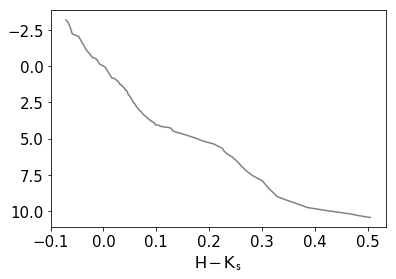

In [7]:
df = pd.read_csv('hr_diagram_revised_input.csv')
data = df.values

df1 = pd.read_csv('zamsdata_mamajek_gaiaconvert.csv')
data1 = df1.values

df2 = pd.read_csv('mamajek_ms_hmink.csv')
data2 = df2.values

df3 = pd.read_csv('mamajek_gmink_hrd_data.csv')
data3 = df3.values

MS_bpminrp_vec = data1[:,1]
MS_MG_bpminrp_vec = data1[:,0]

MS_hmink_vec = data2[:,1]
MS_MK_vec = data2[:,2]

MS_MG_gmink_vec = data3[:,4]
MS_gmink_vec = data3[:,6]

#print MS_bpminrp_vec
#print MS_MG_vec

bp_vec = data[:,1]
rp_vec = data[:,2]

kvec = data[:,6]
hvec = data[:,5]
jvec = data[:,4]

bpminrp_vec = bp_vec - rp_vec

hmink_vec = hvec - kvec
jmink_vec = jvec - kvec

G_vec = data[:,3]

Gmink_vec = G_vec - kvec

plx_vec = data[:,7]
dist_vec = 1000./plx_vec

#print dist_vec

log_dist_vec = np.array([np.log10(dist_vec[i]) for i in range(dist_vec.size)])

dist_mod_vec = (5.*log_dist_vec) - 5.

M_G_vec = G_vec - dist_mod_vec

M_K_vec = kvec - dist_mod_vec

Tdisk_vec = data[:,-2]
Lir_Lstar_vec_raw = data[:,-1]
Lir_Lstar_vec = np.array([float(Lir_Lstar_vec_raw[i]) for i in range(Tdisk_vec.size)])
log_Lir_Lstar_vec = np.log10(Lir_Lstar_vec)
min_log_Lir_Lstar_vec = min(log_Lir_Lstar_vec)

Tdisk_list_use = []
log_Lir_Lstar_list_use = []
M_G_list_use = []
bpminrp_list_use = []
M_K_list_use = []
hmink_list_use = []
Gmink_list_use = []


hot_bpminrp = None
hot_M_G = None
hot_Tdisk = None
hot_Lir_Lstar = None

for i in range(Tdisk_vec.size):
    if Tdisk_vec[i] > 4000.:
        hot_bminv = bminv_vec[i]
        hot_M_v = bminv_vec[i]
        hot_Tdisk = Tdisk_vec[i]
        hot_Lir_Lstar = Lir_Lstar_vec[i]
    else:
        bpminrp_list_use.append(bpminrp_vec[i])
        M_G_list_use.append(M_G_vec[i])
        Tdisk_list_use.append(Tdisk_vec[i])
        log_Lir_Lstar_list_use.append(log_Lir_Lstar_vec[i])
        hmink_list_use.append(hmink_vec[i])
        M_K_list_use.append(M_K_vec[i])
        Gmink_list_use.append(Gmink_vec[i])
        #M_G_gmink_list_use.append(M_G_)
        
        
bpminrp_vec_use = np.array(bpminrp_list_use)
M_G_vec_use = np.array(M_G_list_use)
Tdisk_vec_use = np.array(Tdisk_list_use)
log_Lir_Lstar_vec_use = np.array(log_Lir_Lstar_list_use)

M_K_vec_use = np.array(M_K_list_use)
hmink_vec_use = np.array(hmink_list_use)
Gmink_vec_use = np.array(Gmink_list_use)
        
#size_vec = (log_Lir_Lstar_vec + 1. - min_log_Lir_Lstar_vec)*100.

max_log_Lir_Lstar_vec_use = max(log_Lir_Lstar_vec_use)

m = (50. - 1.)/(max_log_Lir_Lstar_vec_use - min_log_Lir_Lstar_vec)

size_vec = m*(log_Lir_Lstar_vec_use - min_log_Lir_Lstar_vec) + 1.

fig = plt.figure()

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
plt.rcParams.update(params)
        
plt.gcf().subplots_adjust(left = 0.14)
plt.gcf().subplots_adjust(right=0.98)
plt.gcf().subplots_adjust(top=0.86)
plt.gcf().subplots_adjust(bottom=0.17)

xtickpos = [-0.52958,-0.51061,-0.34292,-0.25689,-0.18212,-0.03698,+0.07412,+0.193791,+0.382923,+0.495714,+0.584288,+0.694129,+0.769925,+0.826533,+0.855239,+0.910022,+0.985759,+1.060643,+1.440061,+1.932861,+2.304058]
xticklabel_tex = [r'$\mathrm{O9}$',r'$\mathrm{B0}$',r'$\mathrm{B2}$',r'$\mathrm{B5}$',r'$\mathrm{B8}$',r'$\mathrm{A0}$',r'$\mathrm{A2}$',r'$\mathrm{A5}$',r'$\mathrm{F0}$',r'$\mathrm{F2}$',r'$\mathrm{F5}$',r'$\mathrm{F8}$',r'$\mathrm{G0}$',r'$\mathrm{G2}$',r'$\mathrm{G5}$',r'$\mathrm{G8}$',r'$\mathrm{K0}$',r'$\mathrm{K2}$',r'$\mathrm{K5}$',r'$\mathrm{M0}$',r'$\mathrm{M2}$']
xticklabel = ['O9','B0','B2','B5','B8','A0','A2','A5','F0','F2','F5','F8','G0','G2','G5','G8','K0','K2','K5','M0','M2']

xticklabeltexdict = {xticklabel_tex[i]: xtickpos[i] for i in range(len(xticklabel_tex))}
xticklabeldict = {xticklabel[i]: xtickpos[i] for i in range(len(xticklabel))}


xtickpos_GminK = [-1.060543586,-1.015380891,-0.636630764,-0.443609592,-0.275657562,0.023567874,0.168976954,0.37755883,0.68641431,0.861541118,0.998423643,1.184419419,1.314721505,1.422706079,1.485158105,1.601047865,1.760669122,1.912607286,2.496402185,3.001767315,3.288292342]
#for i in range(len(xtickpos)):

print len(xticklabel)
print len(xtickpos_GminK)

xticklabeldict_GminK = {xticklabel[i]: xtickpos_GminK[i] for i in range(len(xticklabel))}

#xtickpos_short = [-0.30,-0.17,-0.02,+0.15,+0.30,+0.44,+0.58,+0.63,+0.68,+0.81,+0.91,+1.15,+1.40,+1.64]
#xticklabel_short = ['B0','B5','A0','A5','F0','F5','G0','G2','G5','G8','K2','K5','M0','M5']

xticklabelshort_tex = [r'$\mathrm{B0}$',r'$\mathrm{B5}$',r'$\mathrm{A0}$',r'$\mathrm{A5}$',r'$\mathrm{F0}$',r'$\mathrm{F5}$',r'$\mathrm{G0}$',r'$\mathrm{K0}$',r'$\mathrm{K2}$',r'$\mathrm{K5}$',r'$\mathrm{M0}$']
xticklabelshort = ['B5','A0','A5','F0','F5','G0','K0','K5','M0']
xtickposshort = [xticklabeldict[x] for x in xticklabelshort]
xtickposshort_GminK = [xticklabeldict_GminK[x] for x in xticklabelshort]

#ytickpos = [-5.7,-4.5,-4.0,-2.45,-1.2,-0.25,0.65,1.3,1.95,2.7,3.6,3.5,4.0,4.4,4.7,5.1,5.5,5.9,6.4,7.35,8.8,9.9,12.3]

#xticklabel = ['O9','B0','B2','B5','B8','A0','A2','A5','F0','F2','F5','F8','G0','G2','G5','G8','K0','K2','K5','M0','M2']
]

ax1 = fig.add_subplot(111)

print bpminrp_vec_use.size
print M_G_vec_use.size

plt.gca().invert_yaxis()
im = ax1.scatter(bpminrp_vec_use, M_G_vec_use, c = Tdisk_vec_use, s = size_vec)
#ax1.plot(hot_M_v, hot_bminv, 'rx', markersize=8, mew=3)
#ax1.plot(xtickpos,ytickpos,'grey')
ax1.plot(MS_bpminrp_vec,MS_MG_bpminrp_vec,'grey')
#ax1.set_xlim([-0.25,1.5])
ax1.set_ylim([11.,-4.4])
fig.colorbar(im, ax=ax1)

ax2 = ax1.twiny()

ax2.set_xticks(xtickposshort)
ax2.set_xticklabels(xticklabelshort)
ax2.xaxis.set_label_position('top')
ax2.set_xlabel(r'$\mathrm{Main\,\,Seq. Sp. Type}$',fontsize=18)
ax2.set_xlim([-0.25,1.5])


ax1.set_xlabel(r'$\mathrm{G_{Bp} - G_{Rp}}$', fontsize=24)
ax1.set_ylabel(r'$\mathrm{M_{G}}$',fontsize=24)
#plt.show()
plt.savefig('HR_diagram_with_Gaia_colors.pdf')
plt.close()

fig1 = plt.figure()
ax3 = fig1.add_subplot(111)

plt.gca().invert_yaxis()
im = ax3.scatter(hmink_vec_use, M_K_vec_use, c=Tdisk_vec_use, s = size_vec)
fig1.colorbar(im, ax=ax1)
ax3.set_xlabel(r'$\mathrm{H-K_{s}}$',fontsize=18)
ax3.plot(MS_hmink_vec,MS_MK_vec,'grey')
plt.show()

fig2 = plt.figure(figsize=(10.,6.))

plt.gcf().subplots_adjust(left = 0.14)
plt.gcf().subplots_adjust(right=0.98)
plt.gcf().subplots_adjust(top=0.86)
plt.gcf().subplots_adjust(bottom=0.17)

ax4 = fig2.add_subplot(111)

plt.gca().invert_yaxis()
im = ax4.scatter(Gmink_vec_use, M_G_vec_use, c=Tdisk_vec_use, s = size_vec)
fig1.colorbar(im, ax=ax4)
ax4.set_xlim([-0.6,8.2])
ax4.set_xlabel(r'$\mathrm{G-K_{s}}$',fontsize=18)
ax4.plot(MS_gmink_vec,MS_MG_gmink_vec,'grey')
ax4.set_ylabel(r'$\mathrm{M_{G}}$',fontsize=18)
ax4.set_ylim([10.25,-5])

ax5 = ax4.twiny()
ax5.set_xticks(xtickposshort_GminK)
ax5.set_xticklabels(xticklabelshort)
ax5.xaxis.set_label_position('top')
ax5.set_xlabel(r'$\mathrm{Main\,\,Seq. Sp. Type}$',fontsize=18)
ax5.set_xlim([-0.6,8.2])
#plt.show()
plt.savefig('HR_diagram_GminK.pdf')
plt.close()